* Using the readings, try and create a RandomForestClassifier for the iris dataset
* Using a 25/75 training/test split, compare the results with the original decision tree model and describe the result to the best of your ability in your PR

[Link](http://ledeprogram.github.io/algorithms/class9/#50)

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
iris = load_iris()
#from sklearn.datasets import make_moons
from sklearn.cross_validation import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import ndimage
from matplotlib.colors import ListedColormap, colorConverter

## Parameters
* n_estimator
* max_features: “The default values, and a good rule of thumb, are
    * **max_features=sqrt(n_features)** for classification and 
    * **max_features=log2(n_features)** for regression.”
* max_depth


**mglearn**: see https://github.com/amueller/introduction_to_ml_with_python/blob/master/mglearn/

In [2]:
X = iris.data[:,2:] # the attributes
y = iris.target # the target variable

# random_state : int or RandomState
#      Pseudo-random number generator state used for random sampling.

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
 random_state=42, train_size=.25, test_size=.75)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [3]:
# warning - copy-paste from https://github.com/amueller/introduction_to_ml_with_python/

# (no license found)

cm2 = ListedColormap(['#0000aa', '#ff2020'])

def plot_tree_partition(X, y, tree, ax=None):
    if ax is None:
        ax = plt.gca()
    eps = X.std() / 2.

    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 1000)
    yy = np.linspace(y_min, y_max, 1000)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]

    Z = tree.predict(X_grid)
    Z = Z.reshape(X1.shape)
    faces = tree.apply(X_grid)
    faces = faces.reshape(X1.shape)
    border = ndimage.laplace(faces) != 0
    ax.contourf(X1, X2, Z, alpha=.4, cmap=cm2, levels=[0, .5, 1])
    ax.scatter(X1[border], X2[border], marker='.', s=.2)

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    return ax


def plot_2d_separator(classifier, X, fill=False, ax=None, eps=None, alpha=1,
                      cm=cm2, linewidth=None, threshold=None, linestyle="solid"):
    # binary?
    if eps is None:
        eps = X.std() / 2.

    if ax is None:
        ax = plt.gca()

    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 100)
    yy = np.linspace(y_min, y_max, 100)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0] if threshold is None else [threshold]
        fill_levels = [decision_values.min()] + levels + [decision_values.max()]
    except AttributeError:
        # no decision_function
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [.5] if threshold is None else [threshold]
        fill_levels = [0] + levels + [1]
    if fill:
        ax.contourf(X1, X2, decision_values.reshape(X1.shape),
                    levels=fill_levels, alpha=alpha, cmap=cm)
    else:
        ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels,
                   colors="black", alpha=alpha, linewidths=linewidth,
                   linestyles=linestyle, zorder=5)

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

Adaptation of the code used in “Introduction to Machine Learning with Python_RandomForest” >>>


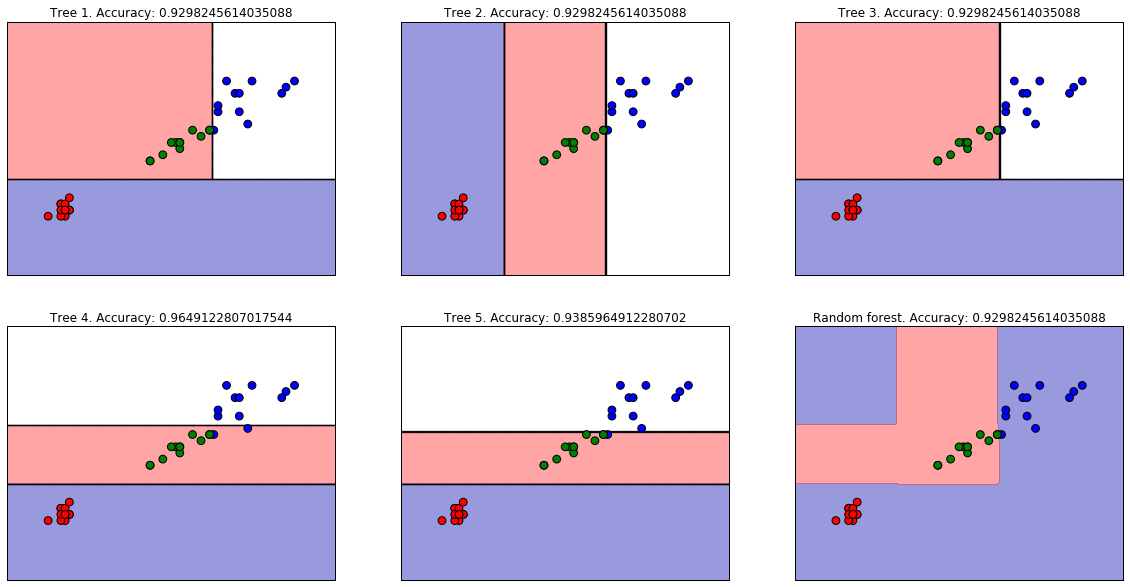

In [4]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    this_tree_accuracy = tree.score(X_test, y_test)    
    ax.set_title("Tree {}. Accuracy: {}".format(i+1, this_tree_accuracy))
    plot_tree_partition(X_train, y_train, tree, ax=ax)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=np.array(['r', 'g', 'b'])[y_train], s=60)    
    
plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
forest_accuracy = forest.score(X_test, y_test)
axes[-1, -1].set_title("Random forest. Accuracy: {}".format(forest_accuracy))
plt.scatter(X_train[:, 0], X_train[:, 1], c=np.array(['r', 'g', 'b'])[y_train], s=60)

print('Adaptation of the code used in “Introduction to Machine Learning with Python_RandomForest” >>>')